In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
from dgpylib import dg_athena
from dgpylib import dg_s3 
import os
import re
from dateutil.relativedelta import relativedelta

import sys
sys.path.insert(0, '../EDA')
import basicstatsandplotter as bstatsplot

import sys
sys.path.insert(0, '../Modelling')
import helper_function2 as hf

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

import parameters

%run 'functions.ipynb'

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# query_result = conn.read(query)
# query_result

In [4]:
conn1 = dg_s3.Connect('dgdatadump/DS&CA/Pricing/02 Projects/2022/Tel_Reg_2.0/Cancellation Model')
df_raw = conn1.read('TelReg_Canx_dedup.csv') #TelReg_Canx_dedup

df_raw12 = conn1.read('TelReg_Canx_filt_12mo.csv')
df_raw9 = conn1.read('TelReg_Canx_filt_9mo.csv')
df_raw6 = conn1.read('TelReg_Canx_filt_6mo.csv')
df_raw3 = conn1.read('TelReg_Canx_filt_3mo.csv')


In [9]:
# feat_imp_performance_df = pd.read_pickle("performance_df.pkl")

predictors = feat_imp_performance_df.loc[0,'feats_stored_gbm']
predictors = predictors[:12]

In [14]:
predictors

['ONS_%people_working_FT',
 'ManufacturerBrandCode',
 'ONS_avg_age',
 'PlansAcceptedPast1YearCount',
 'PlanLiveCount',
 'ClientAccountDesc',
 'PlansActivePast5yrCount',
 'AppAge',
 'ClientGroupDesc',
 'PurchasePrice',
 'ApplianceCode',
 'Fee']

In [15]:
num_predictors = ['ONS_%people_working_FT', 'ONS_avg_age', 'PlansAcceptedPast1YearCount', 'PlanLiveCount', 'PlansActivePast5yrCount', 'AppAge', 'PurchasePrice', 'Fee']

<Figure size 1000x500 with 0 Axes>

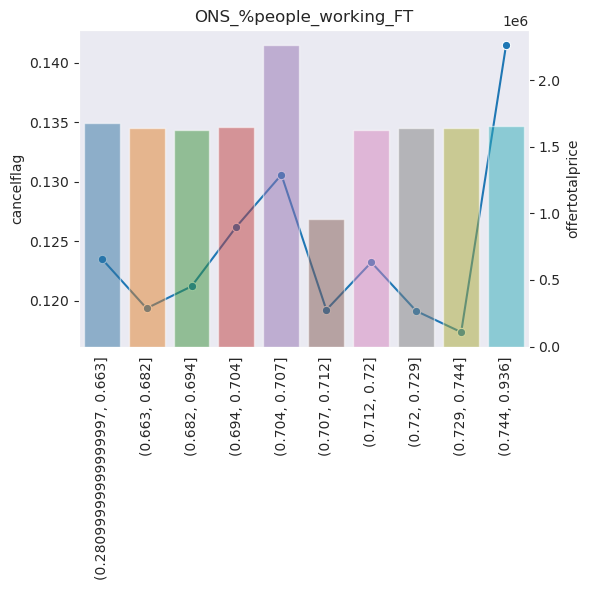

<Figure size 1000x500 with 0 Axes>

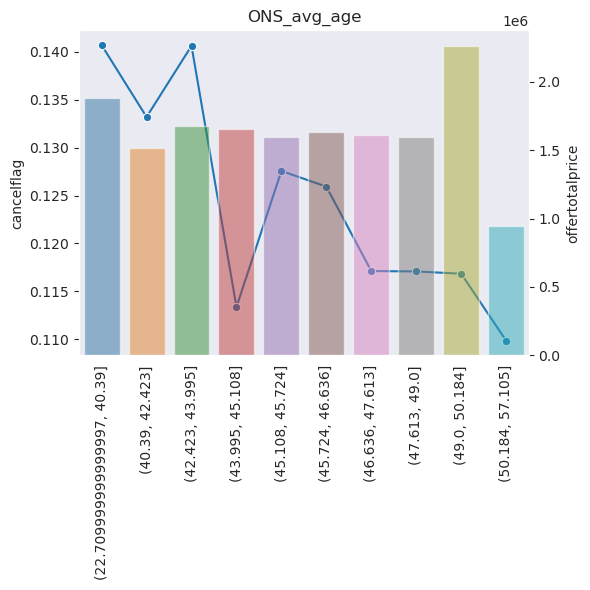

<Figure size 1000x500 with 0 Axes>

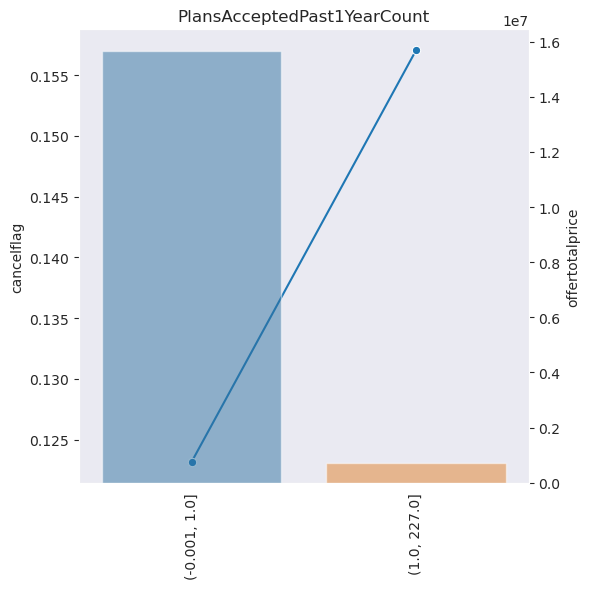

<Figure size 1000x500 with 0 Axes>

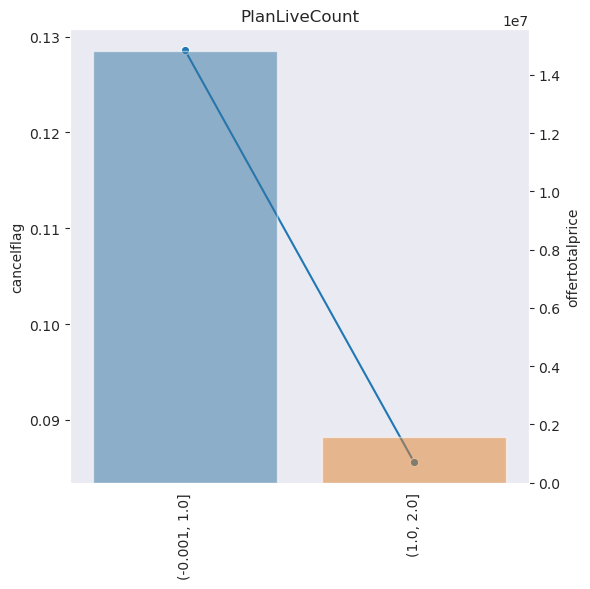

<Figure size 1000x500 with 0 Axes>

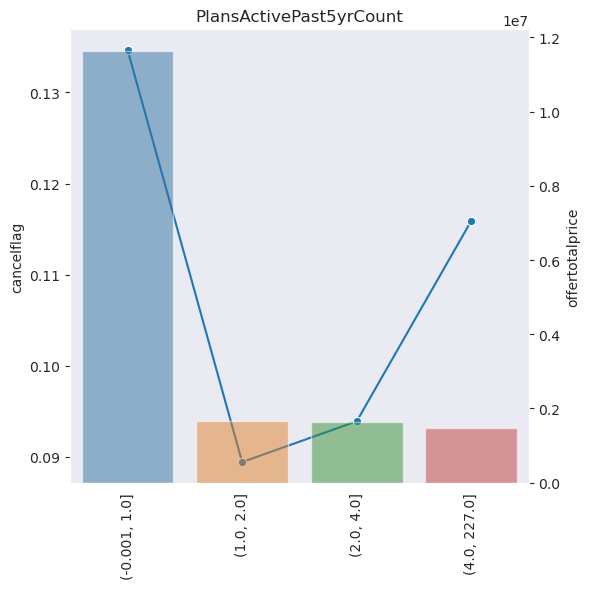

<Figure size 1000x500 with 0 Axes>

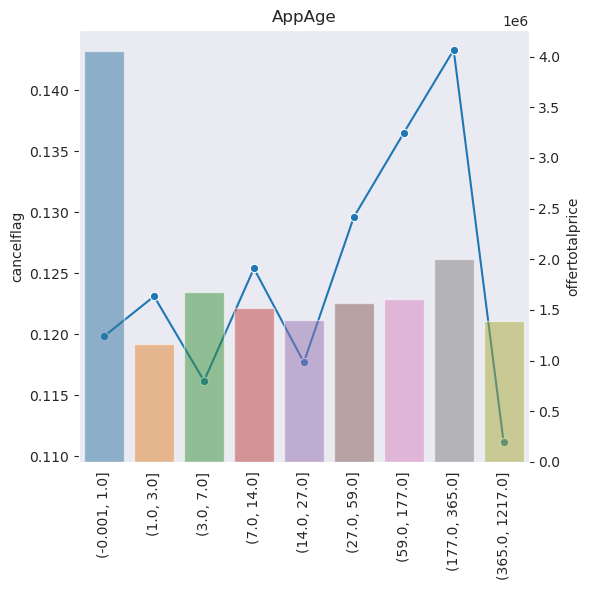

<Figure size 1000x500 with 0 Axes>

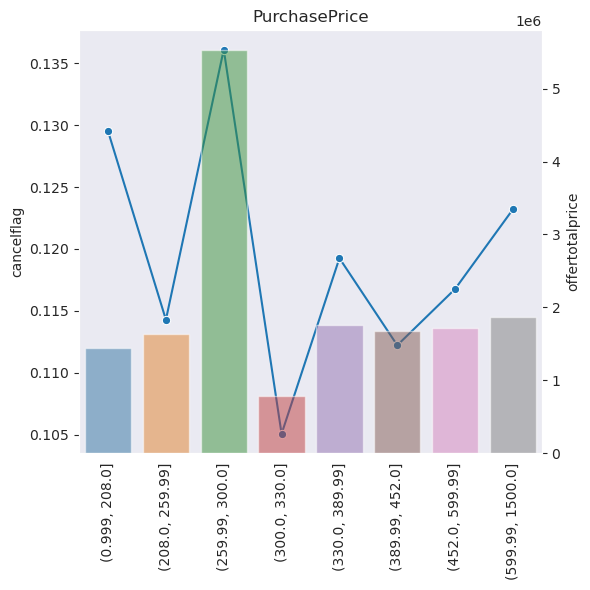

<Figure size 1000x500 with 0 Axes>

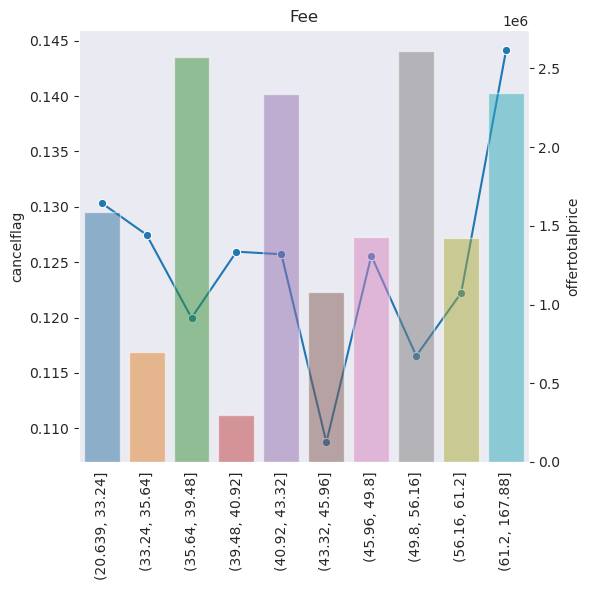

In [16]:
for col in num_predictors:

    num_plot_no_pred(df_raw3, [col], 1, 1, 'cancelflag', 'offertotalprice', nbins=10, target_lim = None)